In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.linalg import eigh 
import numpy as np 
from sklearn.decomposition import PCA 

<div dir=rtl>
א.
<div>


In [ ]:
df = pd.read_csv('prices.csv' )
df.head(5)

<div dir=rtl>
ב. השורה הראשונה מחזירה רשימה באורך של מספר השורות בדאטא פריים ובהן בכל כניסה יש ערך true אם השורה המתאימה היא מתאתרת מסחר שהתרחש ב2016.
השורה השנייה יוצר דאטא פריים אשר בוחר מתוך הדאטא פריים את השורות בהן המסכה מחזירה ערך true.
השורה השלישית והרביעית מדפיסות את הדאטא פריימים בהם הסימן הוא wltw וftv בהתאמה.
השורה החמישית יוצרת דאטא פריים בו הסימן הוא aapl ומאתחלת את האינדקסים שהיו שייכים קודם לדאטא בייס המקורי.
השורה השישית יוצרת דאטא פריים חדש אשר שווה לערכי הסגירה של הדאטא פריים.
השורות השביעית והשמינית דואגות ליצירת תרשים.
<div>


In [ ]:
mask = df['date'].apply(lambda x: x[:4] == '2016') 
df = df[mask] 
print(len(df[df["symbol"] == "WLTW"]["close"])) 
print(len(df[df["symbol"] == "FTV"]["close"])) 
# df = df[df['symbol'] == 'AAPL'].reset_index() 
# apple_close_prices = df.close 
# apple_close_prices.plot() 
# plt.show() 

<div dir=rtl>
ג.
<div>


In [ ]:
def load_shares():
    prices_df = pd.read_csv('prices.csv')
    securities = pd.read_csv('securities.csv')
    symbols = []
    sectors = []
    prices = []
    i = 0
    for s in pd.unique(prices_df['symbol']):
        stocks = prices_df[prices_df['symbol'] == s]
        stocks_2016 = stocks[stocks['date'].apply(lambda x: x[: 4] == '2016')]
        ## there were 252 days in 2016 when the stock exchange was open
        if len(stocks_2016) == 252:
            symbols.append(s)
            sectors.append(list(securities[securities['Ticker symbol'] == s]['GICS Sector'])[0])
            prices.append(stocks_2016['close'])
    return symbols, np.vstack(prices), sectors

<div dir=rtl>
ד.
<div>


In [ ]:
def pca_project(X, k):
    sum_samples = 0
    for sample in X:
        sum_samples = sum_samples + sample
    avg_sample = sum_samples / X.shape[0]
    centered_list = []
    for sample in X:
        centered_list.append(sample - avg_sample)
    centered_matrix = np.vstack(centered_list)
    Uk = np.linalg.svd(centered_matrix, compute_uv=True)[2][:k]
    Uk[1] = -1 * Uk[1]
    proj = centered_matrix @ Uk.T
    return proj

<div dir=rtl>
ה.
<div>


In [ ]:
def plot_sectors(data_set, labels, present_labels):
   for l in range(len(present_labels)):
        x = []
        y = []
        for i in range(data_set.shape[0]):
            if labels[i] == present_labels[l]:
                x.append(data_set[i][0])
                y.append(data_set[i][1])
        plt.scatter(x, y, color=np.random.rand(3,), label=present_labels[l])
   plt.legend()
   plt.show() 

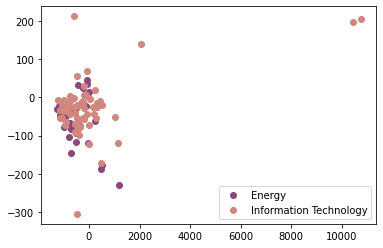

In [ ]:
symbols, prices, sectors = load_shares()
proj = pca_project(prices, 2) 
plot_sectors(proj, sectors, ["Energy", "Information Technology"]) 

<div dir=rtl>
ו.
<div>


In [ ]:
def ln_matrix(X): 
   ln_matrix = np.zeros((X.shape[0], X.shape[1])) 
   for price in range(X.shape[0]): 
       for day in range(X.shape[1]-1): 
           ln_matrix[price, day] = np.log(X[price, day + 1]) - np.log(X[price, day]) 
   return ln_matrix 

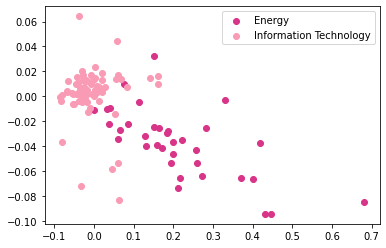

In [ ]:
ln_price_matrix = ln_matrix(price_matrix) 
ln_proj = pca_project(ln_price_matrix, 2) 
plot_sectors(ln_proj, sectors, ["Energy", "Information Technology"]) 

<div dir=rtl>
ז.
בסעיף הקודם ביצענו טרנסופרמציה מנרמלת על המחירים,כך שהמטריצה החדשה מכילה את המחירים המנורמלים.ולכן עם המטריצה 
החדשה ניתן לראות את השינויים במגמות של המניות כאשר מראים את המגמות בעזרת שני צרים.
לפי הגרפים ניתן לראות כי כלכלה וטכנולוגית מידע בעליי מגמות דומות אם לא זהות כי הנקודות סמוכות מאד אחת לשנייה ומכאן נסיק שהמגמה דומה בהתאם ולכן לא כדאי להשקיע בהן בו זמנית. בעוד שבאנרגיה נדלן וטכנולוגית מידע המגמות שונות ולכן השקעה בהן יהווה פיזור טוב.</div>


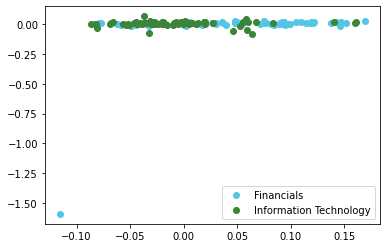

In [ ]:
plot_sectors(ln_proj, sectors, ["Financials","Information Technology"]) 

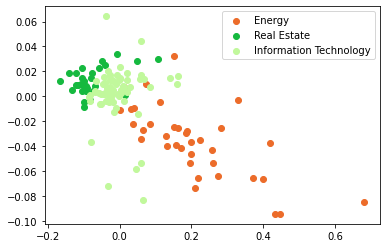

In [ ]:
plot_sectors(ln_proj, sectors, ["Energy", "Real Estate","Information Technology"]) 

<div dir=rtl>
ח.
לאחר מציאת הנקודה בעלת הערך הנמוך ביותר ובדיקת סימנה(ICE) השוונו אותה עם מנייה כלשהי(בחרנו את המנייה במיקום השני באופן שיררותי). ניתן לראות לפי ההשואה כי לקראת זמן הסגירה ערךך המנייה נםל דרמטית, שינוי זה יגרום ללוג השינוי להיות גדול וזה מתבטא גם לאחר ההעתקה של הנתונים.<div>


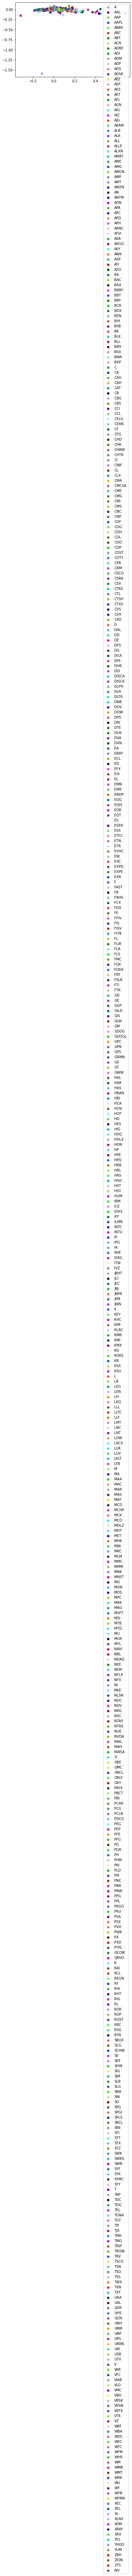

In [ ]:
# plot all stocks in order to find an outlier
plot_sectors(ln_proj, symbols, list(pd.Series(symbols).unique())) 

In [ ]:
## in this part we find the oultier stock
tuples = [(i,ln_proj[i][1]) for i in range(len(ln_proj))]
sort = sorted(tuples,key=lambda x:x[1])
print(symbols[sort[0][0]] + ' in '+str(sort[0][0]))

ICE in 233


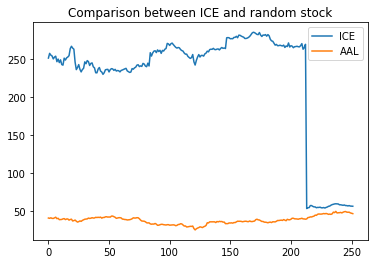

In [ ]:
plt.plot(range(252), prices[233], label=symbols[233]) 
plt.plot(range(252), prices[1], label=symbols[1]) 
plt.title("ICE and random stock") 
plt.legend()
plt.show() 